# ACS Data Sharing
# Utility of Private Data

In this workbook we consider how utility may vary as features are added to a data set.

Some features may disclose private information, and we need to consider the tradeoff between privacy and utility.

We run experiments using prediction models (regressors) to look at the predictive performance using various features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

## Dataset
We use the Inmate Admissions dataset.

In [2]:
data = pd.read_csv("Inmate_Admissions.csv", parse_dates=['ADMITTED_DT','DISCHARGED_DT'])

In [3]:
data.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,2018-01-22 18:32:26,NaT,BLACK,M,DE,220.39
1,70983,2018-01-02 19:05:00,2018-01-10 20:17:00,UNKNOWN,M,DE,NaN
2,2744,2018-01-18 17:40:04,NaT,UNKNOWN,M,DE,140.20
3,20165517,2018-01-09 12:18:49,NaT,UNKNOWN,M,DE,110-120.05
4,20078557,2018-01-15 11:21:00,NaT,BLACK,M,DE,155.25


In [9]:
data.count()

INMATEID              301747
ADMITTED_DT           301747
DISCHARGED_DT         262923
RACE                  301747
GENDER                300999
INMATE_STATUS_CODE    301747
TOP_CHARGE             92530
dtype: int64

In [10]:
# Drop rows where NaT in DISCHARGED_DT
df = data.dropna(subset=['DISCHARGED_DT'])   #Drop only if NaN in specific column (as asked in the question)

In [11]:
df.count()

INMATEID              262923
ADMITTED_DT           262923
DISCHARGED_DT         262923
RACE                  262923
GENDER                262244
INMATE_STATUS_CODE    262923
TOP_CHARGE             60602
dtype: int64

## Derived Features
Derived features can aid prediction.

For instance, from the admission data, we can look at:
- hour of admission
- day of week of admission

In [12]:
df['duration'] = df['DISCHARGED_DT'] - df['ADMITTED_DT']

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df['duration_days'] = df['duration'].apply(lambda x: x.days)

df['admission_year'] = df['ADMITTED_DT'].apply(lambda x: x.year)
df['admission_month'] = df['ADMITTED_DT'].apply(lambda x: x.month)
df['admission_day'] = df['ADMITTED_DT'].apply(lambda x: x.day)
df['admission_hr'] = df['ADMITTED_DT'].apply(lambda x: x.hour)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWa

In [14]:
df['admission_dayofweek'] = df['ADMITTED_DT'].apply(lambda x: x.dayofweek)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['at_int'] = pd.to_timedelta(df.ADMITTED_DT).dt.total_seconds()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df = df.sort_values(['INMATEID','ADMITTED_DT'])

In [30]:
df['adm_count'] = 0
last_inmateid = ''
revisit_count = 1

In [31]:
for i in df.index:
        #val = df.loc[i,'adm_count']
        current_inmateid = df.loc[i,'INMATEID']
        if (current_inmateid == last_inmateid):
            df.loc[i,'adm_count'] = revisit_count
            revisit_count = revisit_count + 1
        else:
            revisit_count = 1
            df.loc[i,'adm_count'] = revisit_count
            last_inmateid = current_inmateid
            

In [32]:
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE,duration,duration_days,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek,at_int,adm_count
164452,17,2017-02-23 23:18:00,2017-02-28 15:01:03,UNKNOWN,F,DE,NaN,4 days 15:43:03,4,2017,2,23,23,3,1.487892e+09,1
129218,30,2016-01-09 01:04:23,2016-01-14 06:13:04,BLACK,M,CS,155.25,5 days 05:08:41,5,2016,1,9,1,5,1.452301e+09,1
152112,30,2016-03-08 20:42:00,2016-03-24 21:23:03,BLACK,M,DE,NaN,16 days 00:41:03,16,2016,3,8,20,1,1.457470e+09,1
166978,40,2015-10-01 17:16:00,2015-10-01 21:24:05,BLACK,M,DE,NaN,0 days 04:08:05,0,2015,10,1,17,3,1.443720e+09,1
236106,49,2017-06-07 01:33:42,2017-06-09 04:21:03,BLACK,M,DE,NaN,2 days 02:47:21,2,2017,6,7,1,2,1.496799e+09,1


# Models
We begin by building sample models from our data.  We will build:
- Linear Regression
- Gradient Boosting

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [21]:
labels = df['duration_days']
#inputs = df.drop(['INMATEID', 'ADMITTED_DT', 'DISCHARGED_DT', 'duration', 'duration_days', 'at_int', 'TOP_CHARGE'],axis=1)
inputs = df.drop(['INMATEID', 'ADMITTED_DT', 'GENDER', 'DISCHARGED_DT', 'duration', 'duration_days', 'at_int', 'TOP_CHARGE'],axis=1)

In [22]:
#inputs.GENDER.unique()

In [23]:
inputs.RACE.unique()

array(['UNKNOWN', 'BLACK', 'ASIAN'], dtype=object)

In [24]:
#inputs['GENDER'] = inputs['GENDER'].fillna('NONE')

In [25]:
le = LabelEncoder()
#inputs['GENDER'] = le.fit_transform(inputs['GENDER'])
inputs['RACE'] = le.fit_transform(inputs['RACE'])
inputs['INMATE_STATUS_CODE'] = le.fit_transform(inputs['INMATE_STATUS_CODE'])

In [26]:
inputs.head()

,RACE,INMATE_STATUS_CODE,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek
1,2,2,2018,1,2,19,1
7,1,2,2018,1,25,1,3
8,2,2,2018,1,7,12,6
10,2,2,2018,1,12,19,4
12,2,2,2018,1,9,3,1


In [27]:
labels.head()

1     8
7     4
8     0
10    5
12    0
Name: duration_days, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
x_train , x_test , y_train , y_test = train_test_split(inputs , labels , test_size = 0.10,random_state =2)

In [32]:
x_train.head()

,RACE,INMATE_STATUS_CODE,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek
216319,2,2,2014,10,17,16,4
268539,1,7,2017,2,24,1,4
65963,1,2,2014,2,3,17,0
148213,1,2,2014,2,21,23,4
64905,2,7,2014,5,19,14,0


In [33]:
reg.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
reg.score(x_test,y_test)

0.1108254132725508

In [35]:
from sklearn import ensemble
gbm = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
gbm.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [37]:
gbm.score(x_test,y_test)

0.30076795160067527

## PIF Calculation
Determine privacy risk using KL Divergence tool.


In [44]:
import klcalculator

In [42]:
# converts dataframe into list of lists
def to_dataset(df: pd.DataFrame, features: list = None) -> list:
    if features is None:
        features = [x for x in df.columns]
    return list(zip(*(df[f].tolist() for f in features)))

In [46]:
features = [x for x in df.columns]
dataset = to_dataset(df)

In [50]:
selected_features = ['RACE', 'GENDER','duration_days']
drop_cols = list(set(df.columns) - set(selected_features))
#selected_df = df.drop(drop_cols,axis=1)
selected_df = df[selected_features]

In [51]:
selected_risks = klcalculator.find_risks_for_records(to_dataset(selected_df))
klcalculator.display_risks(selected_features, selected_risks)

,RACE,GENDER,duration_days
0,0.0009031,0.000936674,0.00789722
1,0.00495473,0.00786386,0.00557966
2,0.0135282,0.0488638,0.00789722
3,0.00401986,0.000999206,0.00789722
4,0.0135282,0.0488638,0.00789722
5,0.00560098,0.0100752,0.00557966
6,0.0135282,0.00374615,0.00557966
7,0.000693183,0.00514924,0.00557966
8,0.0135282,0.0488638,0.00789722
9,0.00069332,0.00493025,0.00557966


In [52]:
risks = klcalculator.find_risks_for_records(to_dataset(selected_df))

In [54]:
klcalculator.display_risks(selected_features, risks)

,RACE,GENDER,duration_days
0,0.0009031,0.000936674,0.00789722
1,0.00495473,0.00786386,0.00557966
2,0.0135282,0.0488638,0.00789722
3,0.00401986,0.000999206,0.00789722
4,0.0135282,0.0488638,0.00789722
5,0.00560098,0.0100752,0.00557966
6,0.0135282,0.00374615,0.00557966
7,0.000693183,0.00514924,0.00557966
8,0.0135282,0.0488638,0.00789722
9,0.00069332,0.00493025,0.00557966


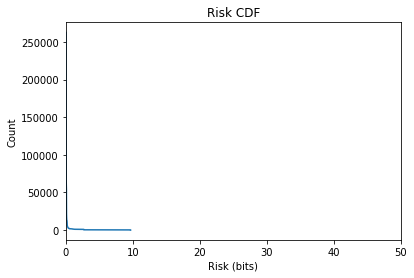

In [55]:
klcalculator.plot_individual_risk_cdf(klcalculator.find_individual_risks(risks))

In [57]:
pif95 = klcalculator.percentile(klcalculator.find_individual_risks(risks), 95)
pif95

0.11939425378196733

# Experiments
An experiment is executing model for a given selection of features to predict a label.

For each experiment we calculate a model score using a variety of models
- Linear regression
- Gradient Boosting

We setup an array of experiments, and can iterate through each one.

In [102]:
# Reset the results, subsequent calls to run experiment will append new results
exp_results = []

In [160]:
# We setup a list of experiments, defining which features to include.
experiments = [
#0
    {
        "description" : '0 - fewest features, private, little utlility',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER']
    },

#1
    {
        "description" : '1a - Inmate status adds value',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'INMATE_STATUS_CODE']
    },


#2
    {
        "description" : '1b - Inmate status adds value',
        "label" : 'duration_days',
        "inputs" : ['GENDER', 'INMATE_STATUS_CODE']
    },
#3    
    {
        "description" : '3 - include 3 static features',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE']
    },

#4
    {
        "description" : '4 - include derived feature',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr']
    },

#5
    {
        "description" : '5 -include derived feature (3 + admission_dayofweek)',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_dayofweek']
    },
    
#6
    {
        "description" : '6 - include derived feature (4 + admission_dayofweek)',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek']
    },
    
#7
    {
        "description" : '7 - include admission time and inmate ID, should be pretty bad privacy, and model may memorise inmate outcomes',
        "label" : 'duration_days',
        # at_int is the admission time in seconds
        "inputs" : ['INMATEID', 'at_int', 'RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek']
    },
    
#8
    {
        "description" : '8 - include admission time',
        "label" : 'duration_days',
        # at_int is the admission time in seconds
        "inputs" : ['at_int', 'RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek']
    },
    



]


In [176]:
# We setup a list of experiments, defining which features to include.
experiments2 = [
    
#0
    {
        "description" : '6a - score duration_days',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek']
    },

#1
    {
        "description" : '6b - score RACE',
        "label" : 'RACE',
        "inputs" : ['GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek', 'duration_days']
    },

#2
    {
        "description" : '6c - score duration_days)',
        "label" : 'GENDER',
        "inputs" : ['RACE', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek', 'duration_days']
    },

#3
    {
        "description" : '6d - score duration_days',
        "label" : 'INMATE_STATUS_CODE',
        "inputs" : ['RACE', 'GENDER', 'admission_hr','admission_dayofweek', 'duration_days']
    },

]


In [173]:
def run_experiment(experiment):
    print('Experiment:',experiment['description'])
    #print(df.columns)
    drop_cols = list(set(df.columns) - set(experiment['inputs']))
    
    # Setup data
    labels = df[experiment['label']]
    inputs = df.drop(drop_cols,axis=1)
    #inputs = df[experiment['inputs']]
    
    #print(inputs.head())

    # Encode categoricals
    le = LabelEncoder()
    
    if 'GENDER' in experiment['inputs']:
        inputs['GENDER'] = inputs['GENDER'].fillna('NONE')
    

    categoricals = ['GENDER','RACE','INMATE_STATUS_CODE']
    # Replace inputs if categoricals
    for col in categoricals:
        if (col in experiment['inputs']) & (col in inputs.columns):
            inputs[col] = le.fit_transform(inputs[col])
    # Replace if label is categorical
    if (experiment['label'] in categoricals):
            labels = le.fit_transform(labels)

    
    #print(inputs.head())

    # Split data
    x_train , x_test , y_train , y_test = train_test_split(inputs , labels , test_size = 0.10,random_state =2)

    # run linear regression
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    lr_score = reg.score(x_test,y_test)    
    print(' lr_score=', lr_score)

    
    # run GBM
    gbm = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')    
    gbm.fit(x_train, y_train)  
    gbm_score = gbm.score(x_test,y_test)
    print(' gbm_score=', gbm_score )
    
    # Calculate PIF risk
    selected_df = inputs
    selected_df[experiment['label']] = labels
    risks = klcalculator.find_risks_for_records(to_dataset(selected_df))
    pif95 = klcalculator.percentile(klcalculator.find_individual_risks(risks), 95)
    print(' pif95=', pif95 )


    # Summarise results
    exp_results.append({
        "description" : experiment['description'],
        "inputs" : experiment['inputs'],
        "label" : experiment['label'],
        "dropped" : drop_cols,
        "lr_score" : lr_score,
        "gbm_score" : gbm_score,
        "pif95" : pif95,
        })



In [153]:
def view_experiment_pif(experiment):
    print('Experiment:',experiment['description'])
    #print(df.columns)
    drop_cols = list(set(df.columns) - set(experiment['inputs']))
    
    # Setup data
    labels = df[experiment['label']]
    inputs = df.drop(drop_cols,axis=1)
    #inputs = df[experiment['inputs']]
    
    # Calculate PIF risk
    selected_df = inputs
    selected_df[experiment['label']] = labels
    risks = klcalculator.find_risks_for_records(to_dataset(selected_df))
    pif95 = klcalculator.percentile(klcalculator.find_individual_risks(risks), 95)
    print(' pif95=', pif95 )
    
    klcalculator.plot_individual_risk_cdf(klcalculator.find_individual_risks(risks))
    klcalculator.display_risks(selected_features, selected_risks)
    klcalculator.display_risks(selected_df.columns, risks)


In [177]:
experiments2[1]

{'description': '6b - score RACE',
 'inputs': ['GENDER',
  'INMATE_STATUS_CODE',
  'admission_hr',
  'admission_dayofweek',
  'duration_days'],
 'label': 'RACE'}

In [178]:
run_experiment(experiments2[1])

Experiment: 6b - score RACE
 lr_score= 0.0005939477288607886
 gbm_score= 0.004855340333393854
 pif95= 14.050385006132728


Experiment: 7 - include admission time and inmate ID, should be pretty bad privacy, and model may memorise inmate outcomes
 pif95= 58.28010014489268


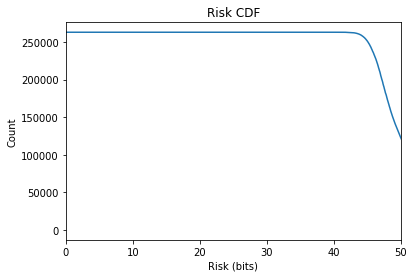

In [163]:
#view_experiment_pif(experiments[7])

In [149]:
selected_experiment=8
selected_features = experiments[selected_experiment]['inputs'] + [experiments[selected_experiment]['label']]
selected_df = df[selected_features]
selected_risks = klcalculator.find_risks_for_records(to_dataset(selected_df))
klcalculator.display_risks(selected_features, selected_risks)

,INMATEID,at_int,RACE,GENDER,INMATE_STATUS_CODE,admission_hr,admission_dayofweek,duration_days
0,15.6824,18.0043,1.20706,0.147928,0.465986,4.01524,2.86721,5.86217
1,18.0043,18.0043,0.866189,0.147928,0.465986,3.72554,2.51958,3.66994
2,18.0043,18.0043,1.20706,0.147928,0.465986,3.46167,3.09504,2.71606
3,16.0043,18.0043,1.20706,0.147928,0.465986,4.01524,2.55159,4.38796
4,15.4193,18.0043,1.20706,0.147928,0.465986,6.57906,2.86721,2.71606
5,18.0043,18.0043,0.866189,0.147928,7.45257,4.01524,2.55159,7.06912
6,18.0043,18.0043,0.866189,0.147928,0.465986,3.67764,2.55159,2.71606
7,15.6824,18.0043,0.866189,0.147928,0.465986,4.9198,3.1153,4.36144
8,18.0043,18.0043,1.20706,0.147928,0.465986,3.94663,2.55159,2.71606
9,16.4193,18.0043,0.866189,0.147928,2.71063,3.67764,2.55159,4.09149


## Review Experiment Results
Tabularise the results in a dataframe

In [121]:
exp_results_df = pd.DataFrame(exp_results)

In [164]:
#exp_results_copy = exp_results
exp_results_df.to_csv(r'Experiment1.csv')

In [122]:
exp_results_df

,description,dropped,gbm_score,inputs,label,lr_score,pif95
0,"0 - fewest features, private, little utlility","[at_int, ADMITTED_DT, admission_month, admissi...",0.003316,"[RACE, GENDER]",duration_days,0.002060,0.119394
1,1a - Inmate status adds value,"[GENDER, at_int, ADMITTED_DT, admission_month,...",0.223744,"[RACE, INMATE_STATUS_CODE]",duration_days,0.091346,2.153478
2,1b - Inmate status adds value,"[at_int, ADMITTED_DT, admission_month, admissi...",0.223343,"[GENDER, INMATE_STATUS_CODE]",duration_days,0.092231,2.136367
3,3 - include 3 static features,"[at_int, ADMITTED_DT, admission_month, DISCHAR...",0.224959,"[RACE, GENDER, INMATE_STATUS_CODE]",duration_days,0.092323,2.370086
4,4 - include derived feature,"[at_int, ADMITTED_DT, admission_month, DISCHAR...",0.242242,"[RACE, GENDER, INMATE_STATUS_CODE, admission_hr]",duration_days,0.092343,6.850110
5,5 -include derived feature (3 + admission_dayo...,"[at_int, ADMITTED_DT, admission_month, DISCHAR...",0.242569,"[RACE, GENDER, INMATE_STATUS_CODE, admission_d...",duration_days,0.092444,5.678320
6,6 - include derived feature (4 + admission_day...,"[at_int, ADMITTED_DT, admission_month, DISCHAR...",0.258315,"[RACE, GENDER, INMATE_STATUS_CODE, admission_h...",duration_days,0.092457,14.050385
7,7 - include admission time,"[ADMITTED_DT, admission_month, DISCHARGED_DT, ...",0.307773,"[INMATEID, at_int, RACE, GENDER, INMATE_STATUS...",duration_days,0.111648,58.280100


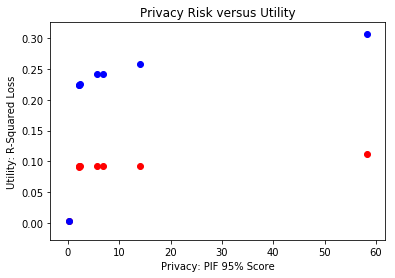

In [156]:
import matplotlib.pyplot as plt
plt.scatter(exp_results_df['pif95'], exp_results_df['lr_score'], color='r')
plt.scatter(exp_results_df['pif95'], exp_results_df['gbm_score'], color='b')
plt.title('Privacy Risk versus Utility')
plt.xlabel('Privacy: PIF 95% Score')
plt.ylabel('Utility: R-Squared Loss')
plt.show()

## Rerun All Experiments
Will iterate through all experiments, regenerating results from scratch.

Could take a while to execute. 1-2 min per experiment.

In [167]:
exp_results = []
for experiment in experiments2:
    run_experiment(experiment)

Experiment: 6a - score duration_days
 lr_score= 0.09245710419304187
 gbm_score= 0.25829927460901225
 pif95= 14.050385006132728
Experiment: 6b - score RACE


ValueError: could not convert string to float: 'UNKNOWN'